In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import accretion_mass, surviving_mass, accretion_surviving_mass, SHMF
import os
import warnings; warnings.simplefilter('ignore')


In [5]:
tree_test = np.load("../../data/evo/tree_0.npz")

tree_test["mass"].shape

(14123, 354)

In [6]:
tree_test = np.load("../../data/evo/tree_3.npz")

tree_test["mass"].shape

(1579, 354)

In [5]:
evtree_test = np.load("../../data/evo/tree_0.npz")

evtree_test["mass"].shape

(14123, 354)

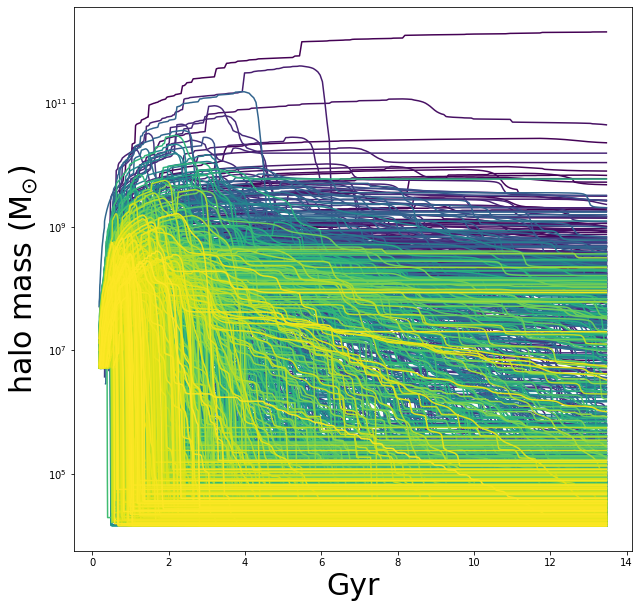

ValueError: too many values to unpack (expected 2)

In [7]:
test_acc, test_red = surviving_mass("../../data/evo/tree_3.npz", mlres=1e8, plot_evo=True)

In [ ]:
test_acc[0:50]

In [ ]:
plt.scatter(np.log10(ana_mass/ana_mass[0]), np.zeros(ana_mass.shape))
plt.show

In [ ]:
acc_data = np.load("../../data/dm_13_8_2900/acc_mass.npy")

surv_data = np.load("../../data/dm_13_8_2900/surv_mass.npy")

as_data = np.load("../../data/dm_13_8_2900/acc_surv_mass.npy")

mass_lim = -5

In [ ]:
acc_ave = np.average(acc_data, axis=0)

acc_max_mass = np.max(acc_ave)

acc_logm_M = np.log10(acc_ave/acc_max_mass)

acc_data = acc_logm_M[~np.isinf(acc_logm_M)]

In [ ]:
surv_ave = np.average(surv_data, axis=0)

surv_max_mass = np.max(surv_ave)

surv_logm_M = np.log10(surv_ave/surv_max_mass)

surv_data = surv_logm_M[~np.isinf(surv_logm_M)]

In [ ]:
as_ave = np.average(as_data, axis=0)

as_max_mass = np.max(as_ave)

as_logm_M = np.log10(as_ave/as_max_mass)

as_data = as_logm_M[~np.isinf(as_logm_M)]

In [ ]:
plt.figure(figsize=(10,10))

plt.hist(acc_data, bins=20, label="accretion mass", ec='white')
plt.hist(as_data, bins=20, label="accretion mass of surviving", ec='white')
plt.hist(surv_data, bins=20, label="surviving mass", ec='white')


plt.yscale("log")
plt.xlabel("log (m/M)", fontsize=20)

plt.legend(fontsize=20, loc=2)
plt.show()

In [ ]:
acc_bins, acc_SHMF_ave, acc_SHMF_std = SHMF(acc_data, mass_min=mass_lim)

In [ ]:
surv_bins, surv_SHMF_ave, surv_SHMF_std = SHMF(surv_data, mass_min=mass_lim)

In [ ]:
as_bins, as_SHMF_ave, as_SHMF_std = SHMF(as_data, mass_min=mass_lim)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(acc_bins, np.log10(acc_SHMF_ave/(acc_bins[1]-acc_bins[0])), label="Unevolved", marker="o", color="black")
plt.plot(surv_bins, np.log10(surv_SHMF_ave/(surv_bins[1]-surv_bins[0])), label="Evolved-surviving", marker="o", color="red")
plt.plot(as_bins, np.log10(as_SHMF_ave/(as_bins[1]-as_bins[0])), label="Evolved-accretion", marker="o", color="pink")
plt.xlabel("log (m/M)", fontsize=20)
plt.ylabel("log[ dN / dlog(m/M) ]", fontsize=20)
plt.legend(fontsize=20)
plt.show()